In [1]:
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2
%pylab inline
# %pylab notebook
# %load_ext wurlitzer
# standard imports

import time
import numpy as np
from collections import namedtuple
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# drake + externals imports
from director import viewerclient as vc
from irispy import Polyhedron
import pydrake.solvers.mathematicalprogram as mathematicalprogram

# boxatlas
import boxatlas.boxatlas as box
from boxatlas.contactstabilization import BoxAtlasContactStabilization
from boxatlas.contactstabilizationutils import ContactStabilizationUtils as CSU
from utils.polynomial import Polynomial
from utils.piecewise import Piecewise
from boxatlas.boxatlascontroller import BoxAtlasController

Populating the interactive namespace from numpy and matplotlib


In [2]:
# construct a visualizer object
vis = vc.Visualizer()

None

solution took =  0.737874984741


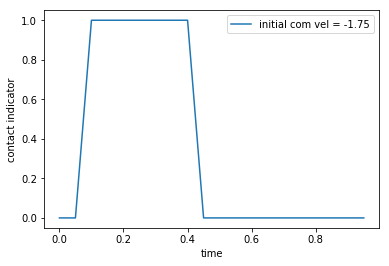

In [3]:
controller = BoxAtlasController()
robot = controller.defaults.robot
initial_state = CSU.make_default_initial_state(robot)
initial_state.vcom[0] = -1.75 # set initial velocity of com
# initial_state.contact_indicator = np.array([0,1,1,0], dtype=int)

opt = controller.construct_contact_stabilization_optimization(initial_state)

solnData = opt.solve()
box.planPlayback(vis, solnData, slider=True)
print("solution took = ", solnData.solve_time)
CSU.plot_contact_indicator(solnData)
control_input = controller.extract_control_input_from_soln(solnData)

In [6]:
control_input.force_indicator[1]

True